# ML Assignment: 1
Starting Assignment 1 of Machine Learning, tackling both theoretical concepts and practical questions.

## Theoretical Questions

### Exercise 1
Compare t-test and z-test in terms of assumptions, population standard deviation, and
use case.

#### Answer
Lets first take a look at both Student's t-score & Normal z-score formula for hypothesis testing:


$$ t = \frac{\bar{X} - \mu}{s / \sqrt{n}} $$

$$ z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} $$

The difference between both of these formulas is between `s`(**sample standard deviation**) and the `σ` (**population standard deviation**).

So we could answer the question like this:
- Assumptions:
- - z-test: Requires known population standard deviation, normally distributed data, and large sample size (n ≥ 30).
- - t-test: Uses sample standard deviation, assumes normality (or approximate normality for small n), and is suitable for small samples.
- Population Standard Deviation:
- - z-test uses the population standard deviation; t-test uses the sample standard deviation.
- Use Case:
- - Use a z-test for large samples with known population parameters. Use a t-test for small samples or when population parameters are unknown.

### Exercise 2
A tech company is deploying a recommendation system for a music streaming platform.
Suppose user ratings for songs (on a scale from 1 to 5) follow a non-normal distribution.
If we take a large enough sample, how does CLT justify using a normal approximation
for constructing confidence intervals? If the mean predicted rating for a song is 4.2 with
a standard deviation of 0.5, how can we use CLT to determine the probability that a
randomly selected user will rate the song above 4.5?

#### Answer
First we must clarify something about Centeral Limit Theorem that might be confusing with out knowing it.

- **CLT**:
The Central Limit Theorem in Statistics states that as the sample size increases and its variance is finite, then the **distribution of the sample mean approaches normal distribution** irrespective of the shape of the population distribution. [geeksforgeeks reference](https://www.geeksforgeeks.org/central-limit-theorem/)

So we could say that the distribution of the **sample mean** approaches normal distribution not any sample from the population.

And for the probabilty calculation we must first convert the `X: 4.5` value to the normal `Z` value:

for values:
$$ \mu = 4.2 $$
$$ \sigma = 0.5$$
$$ z = \frac{\bar{X} - \mu}{\sigma} = \frac{4.5 - 4.2}{0.5} = 0.6$$
Now we find the probability of Z > 0.6 using the Table from `John E. Freund's Mathematical Statistics`
$$P(Z > 0.6) = 1 - 0.7257 = 0.2743$$

### Exercise 3
You are given a dataset containing information about customers in an online retail store.
The dataset includes the following features:
- Age
- Annual Income
- Customer Satisfication Score
- Preferred Payment Method

For each of the following scenarios, determine the most appropriate statistical test from the options: Pearson’s Correlation, Spearman’s Rank Correlation, or Chi-Square Test. Then, apply the test using the dataset provided and interpret the result.

#### Tests
- **[Pearson's Correlation](https://datatab.net/tutorial/pearson-correlation)** -> Measures the linear relationship between two continuous variables. **Parametric**
- **[Spearman’s Rank Correlation](https://datatab.net/tutorial/spearman-correlation)** -> Measures the monotonic relationship between two variables (non-linear trends) **Non-Parametric**.
- **[Chi-Square Test](https://datatab.net/tutorial/chi-square-test)** -> Tests the association between categorical variables **Non-Parametric**.

#### Parametric Vs Non-Parametric
parametric assumes follows a specifc distribution but in non-parametric there is no strict.
datatypes in parametric is continues and numerical but in non-parametric is ordinal or categorical.

And some more differences but for answering this part we just need these.

#### Scenario (a):
The store owner wants to examine whether there is a linear relationship between Age and Annual Income of customers. Which statistical test should be applied? Compute the test statistic and interpret the result.

#### Answer
Because both Age and Annual Income of customers are continues and we wants to find the linear relationship between these variables based on the comparison that we talked about it earlier we might want to use `Pearson's Correlation`.

For the calculations we use some python code for eaiser calculations:

In [66]:
import pandas as pd
from scipy.stats import pearsonr

# Sample Data in Assignment: 
data = {
    'Age': [25, 32, 40, 50, 60],
    'Annual Income (USD)': [40_000, 55_000, 65_000, 70_000, 85_000]
}

df = pd.DataFrame(data)
display(df)
r, p_value = pearsonr(df['Age'], df['Annual Income (USD)'])
print(f"Pearson's r: {r:.2f}, p-value: {p_value:.4f}")

,Age,Annual Income (USD)
0,25,40000
1,32,55000
2,40,65000
3,50,70000
4,60,85000


Pearson's r: 0.98, p-value: 0.0035


#### Interpretation
Based on the high value of `r=0.98` and knowing that Pearson's Correlation is between -1 to 1 we could say that there is strong positive linear relationship.

#### Scenario (b):
The store owner wants to check whether there is a monotonic relationship between
Age and Customer Satisfaction Score. Which statistical test should be applied?
Compute the test statistic and interpret the result.

#### Answer
As in the question highlighted that we want to have a monotonic relationship between Age and Customer Satisfaction  Score, we might want to use `Spearman’s Rank Correlation`.

For the calculations we use some python code for eaiser calculations:

In [73]:
from scipy.stats import spearmanr

# Sample Data in Assignment: 
age = [25, 32, 40, 50, 60]
satisfaction = [8, 6, 7, 5, 3]

rho, p_value = spearmanr(age, satisfaction)
print(f"Spearman's ρ: {rho:.2f}, p-value: {p_value:.4f}")

Spearman's ρ: -0.90, p-value: 0.0374


#### Interpretation
Based on the high value of `ρ=-0.90` There is a strong negative correlation between age and satisfaction.

### Exercise 4
What is the key difference between the Mann-Whitney U test and the Wilcoxon Signed-Rank test? Suppose you are testing two marketing strategies’ effectiveness, but the data is non-normally distributed. Which test would you use?


#### Tests
- **[Mann-Whitney U test](https://datatab.net/tutorial/mann-whitney-u-test)**: The Mann-Whitney U-Test tests whether there is a difference between two samples. To determine if there is a difference between two samples, the rank sums of the two samples are used rather than the means as in the t-test for **independent samples**. The Mann-Whitney U test is thus the non-parametric counterpart to the t-test.
- **[Wilcoxon Signed-Rank test](https://datatab.net/tutorial/wilcoxon-test)**: The Wilcoxon test (Wilcoxon signed-rank test) determines whether two dependent groups differ significantly from each other. To do this, the Wilcoxon test uses the ranks of the groups instead of the mean values. The Wilcoxon test is a non-parametric test, parametric counterpart to the paired samples t-test.


#### Comparison
1) Both tests are non-parametric alternatives to t-tests, meaning they don’t assume normality.
2) Mann-Whitney U Test compares independent groups but the Wilcoxcon Test compares independent groups (like group A is a running test at morning and group B is another running test with same previous group members but at night).
3) Both of them use rankings to determine the differences.

### Exercise 5
We have collected a dataset with three numerical features and one categorical feature called group. The group feature represents three different experimental conditions (1, 2, or 3). Our goal is to determine whether the groups significantly differ given the numerical feature X.

#### Test
Before we dive into each scenarios lets take a look at summary of some tests:

- **[ANOVA](https://datatab.net/tutorial/anova)**: analysis of variance (ANOVA) tests whether statistically significant differences exist between more than two samples. For this purpose, the means and variances of the respective groups are compared with each other. In contrast to the t-test, which tests between two samples, ANOVA tests between more than two groups. Type of this test is parametric so it assumes the **normally distribution and homogeneity**. Also this test is used for independent groups.
- **[Kruskal-Wallis](https://datatab.net/tutorial/kruskal-wallis-test)**: The Kruskal-Wallis test (H test) is a non-parametric statistical test used to compare three or more independent groups to determine if there are statistically significant differences between them. As this test isn't non-parametric **there is no strict to have normally distribution and homogeneity**. Also this test is used for independent groups.
- **[Shapiro-Wilk Test]()**: The Shapiro-Wilk test is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. So might want to use this later on this exercise. We must note that there another tests for normality (e.g. Kolmogorov-Smirnov Test, Anderson-Darling Test) but because there is no restricition to explain them we skip these.

#### Scenario (a)
We want to see whether the groups differ given this feature X or not. Now, we should choose between these two tests (ANOVA or Kruskal-Wallis). In your opinion, what should we check (test) to help us choose between these two tests And once you have made your choice, apply your test. (Consider P-Value less than 0.05.)

#### Answer
So the question says we must to check there is difference or not, and we have two options called ANOVA & Kruskal-Wallis. With the previous summary we know that their bigest differnce is that ANOVA is parametric (assume normality & homogeneity) and Kruskal-Wallis is non-parametric, so we take a Shapiro-Wilk Test on this sample to check which test we must use.

We use some python packages for have easier calculations:

In [108]:
from scipy.stats import shapiro

feature_x = [10.2, 10.8, 11.0, 18.5, 17.9, 18.2, 30.1, 29.8, 30.3]
feature_y = [7.8, 8.1, 7.5, 6.9, 7.3, 6.8, 6.2, 6.5, 6.0]
feature_z = [5.4, 5.2, 5.8, 6.2, 6.0, 5.9, 7.0, 7.1, 6.9]

# Shapiro-Wilk test for normality
_, p1 = shapiro(feature_x)
_, p2 = shapiro(feature_y)
_, p3 = shapiro(feature_z)

print(f"Normality p-values: {p1:.3f}, {p2:.3f}, {p3:.3f}")

Normality p-values: 0.048, 0.891, 0.387


#### Interpretation
Since the p-value for feature_x (Group 1) is less than 0.05, this indicates a rejection of the normality assumption for that group. When even one group deviates from normality, the validity of the ANOVA test becomes questionable.

Therefore, the non-parametric `Kruskal-Wallis` test is more appropriate in this scenario because it does not assume normality of the data.

#### Scenario (b)
Based on the result of (a), apply the appropriate Statistical Test (ANOVA or
Kruskal-Wallis) to determine if there is a significant difference between the groups.
Which one would you use and why?


#### Answer 
Answer of this question is in the previous answer and with those that in mind we use Kruskal-Wallis test and use some python packages for easier calculations:

In [120]:
from scipy.stats import kruskal

feature_x = [10.2, 10.8, 11.0, 18.5, 17.9, 18.2, 30.1, 29.8, 30.3]
feature_y = [7.8, 8.1, 7.5, 6.9, 7.3, 6.8, 6.2, 6.5, 6.0]
feature_z = [5.4, 5.2, 5.8, 6.2, 6.0, 5.9, 7.0, 7.1, 6.9]

h_stat, p_kruskal = kruskal(feature_x, feature_y, feature_z)
print(f"Kruskal-Wallis p-value: {p_kruskal:.4f}")

Kruskal-Wallis p-value: 0.0001


#### Interpretation 
Since the p-value (0.0001) is less than the significance level of 0.05, we conclude that there is a statistically significant difference between the groups for the numerical feature X.

#### Scenario (c)
Assume the normality assumption holds. If you wanted to check whether the groups
also significantlly differ given all three features (X, Y and Z), what statistical test
could have been used?

#### Answer
When we have multiple continuous dependent variables (in this case, X, Y, and Z) and a single categorical independent variable (the groups), and the assumption of normality holds, you would typically use Multivariate Analysis of Variance (**[MANOVA](https://www.ibm.com/docs/sl/spss-statistics/beta?topic=statistics-multivariate-analysis-variance-manova)**).

MANOVA tests whether the mean vectors of the dependent variables differ across the groups. It is particularly useful when the dependent variables might be correlated, as it accounts for their interrelationships while testing for overall group differences.

#### Scenario (c)
For feature selection, you can apply ANOVA or Kruskal-Wallis to each feature individually to test if its distribution significantly differs across groups. If a feature yields a p-value below 0.05, it suggests that the feature varies across groups and may be a useful predictor. Use ANOVA when the data are normally distributed, or Kruskal-Wallis when the normality assumption is violated.

In [133]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

# Sample dataset with a 'group' column and three features X, Y, and Z
data = {
    'group': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'X': [10.2, 10.8, 11.0, 18.5, 17.9, 18.2, 30.1, 29.8, 30.3],
    'Y': [7.8, 8.1, 7.5, 6.9, 7.3, 6.8, 6.2, 6.5, 6.0],
    'Z': [5.4, 5.2, 5.8, 6.2, 6.0, 5.9, 7.0, 7.1, 6.9]
}
df = pd.DataFrame(data)

groups = df['group'].unique()

print("ANOVA results:")
for feature in ['X', 'Y', 'Z']:
    group_data = [df[df['group'] == g][feature].values for g in groups]
    stat, p = f_oneway(*group_data)
    print(f"Feature {feature}: p-value = {p:.4f}")

print("\nKruskal-Wallis results:")
for feature in ['X', 'Y', 'Z']:
    group_data = [df[df['group'] == g][feature].values for g in groups]
    stat, p = kruskal(*group_data)
    print(f"Feature {feature}: p-value = {p:.4f}")


ANOVA results:
Feature X: p-value = 0.0000
Feature Y: p-value = 0.0013
Feature Z: p-value = 0.0003

Kruskal-Wallis results:
Feature X: p-value = 0.0273
Feature Y: p-value = 0.0273
Feature Z: p-value = 0.0273


#### Interpretation 
Both tests confirm that features X, Y, and Z are significant in differentiating the groups. These test supports the conclusion that these features are useful for predicting group membership.

## Practical Questions
For the practical questions we have two data set called `Sleep Health and Lifestyle Dataset` and `Student Performance Factors dataset`.

### Sleep Health and Lifestyle Dataset
Let's take a look at this data set.

### EDA

In [141]:
import pandas as pd

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [151]:
# Features
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [153]:
# Some basic data about our dataset
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [157]:
df.shape

(374, 13)

In [159]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [161]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

based on the types of each feature and number of unique values for them we coul say that the **Numerical** and **Categorical** features are like this:

#### Numerical
- Age
- Sleep Duration
- Heart Rate
- Daily Steps

#### Categorical 
- Gender
- Occupation
- BMI Category
- Blood Pressure
- Sleep Disorder
- Quality of Sleep
- Stress Level

In [242]:
# Don't include Person ID
for col in df.columns[1:]:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 20)

Unique values in 'Gender':
['Male' 'Female']
--------------------
Unique values in 'Age':
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
--------------------
Unique values in 'Occupation':
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
--------------------
Unique values in 'Sleep Duration':
[6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
--------------------
Unique values in 'Quality of Sleep':
[6 4 7 5 8 9]
--------------------
Unique values in 'Physical Activity Level':
[42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
--------------------
Unique values in 'Stress Level':
[6 8 7 4 3 5]
--------------------
Unique values in 'BMI Category':
['Overweight' 'Normal' 'Obese' 'Normal Weight']
--------------------
Unique values in 'Blood Pressure':
['126/83' '125/80' '140/90' '120/80' '13

In [220]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

We have 374 rows, and in the `df.isnull().sum()` output, we can see that there are some null values in the Sleep Disorder column.
One important point to note is that the possible values in the Sleep Disorder column are `[nan, 'Sleep Apnea', 'Insomnia']`. Here, `nan` is recognized by Pandas as a null value, but in this case, it actually represents a valid category—indicating that someone does not have a sleep disorder.

but we could fill it using some names, like `No Disorder` or etc.

In [250]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("No Disorder")

In [254]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [256]:
df.duplicated().sum()

0

In [267]:
# Don't include the Person ID
df.iloc[:,1:].describe().style.background_gradient()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Visualization

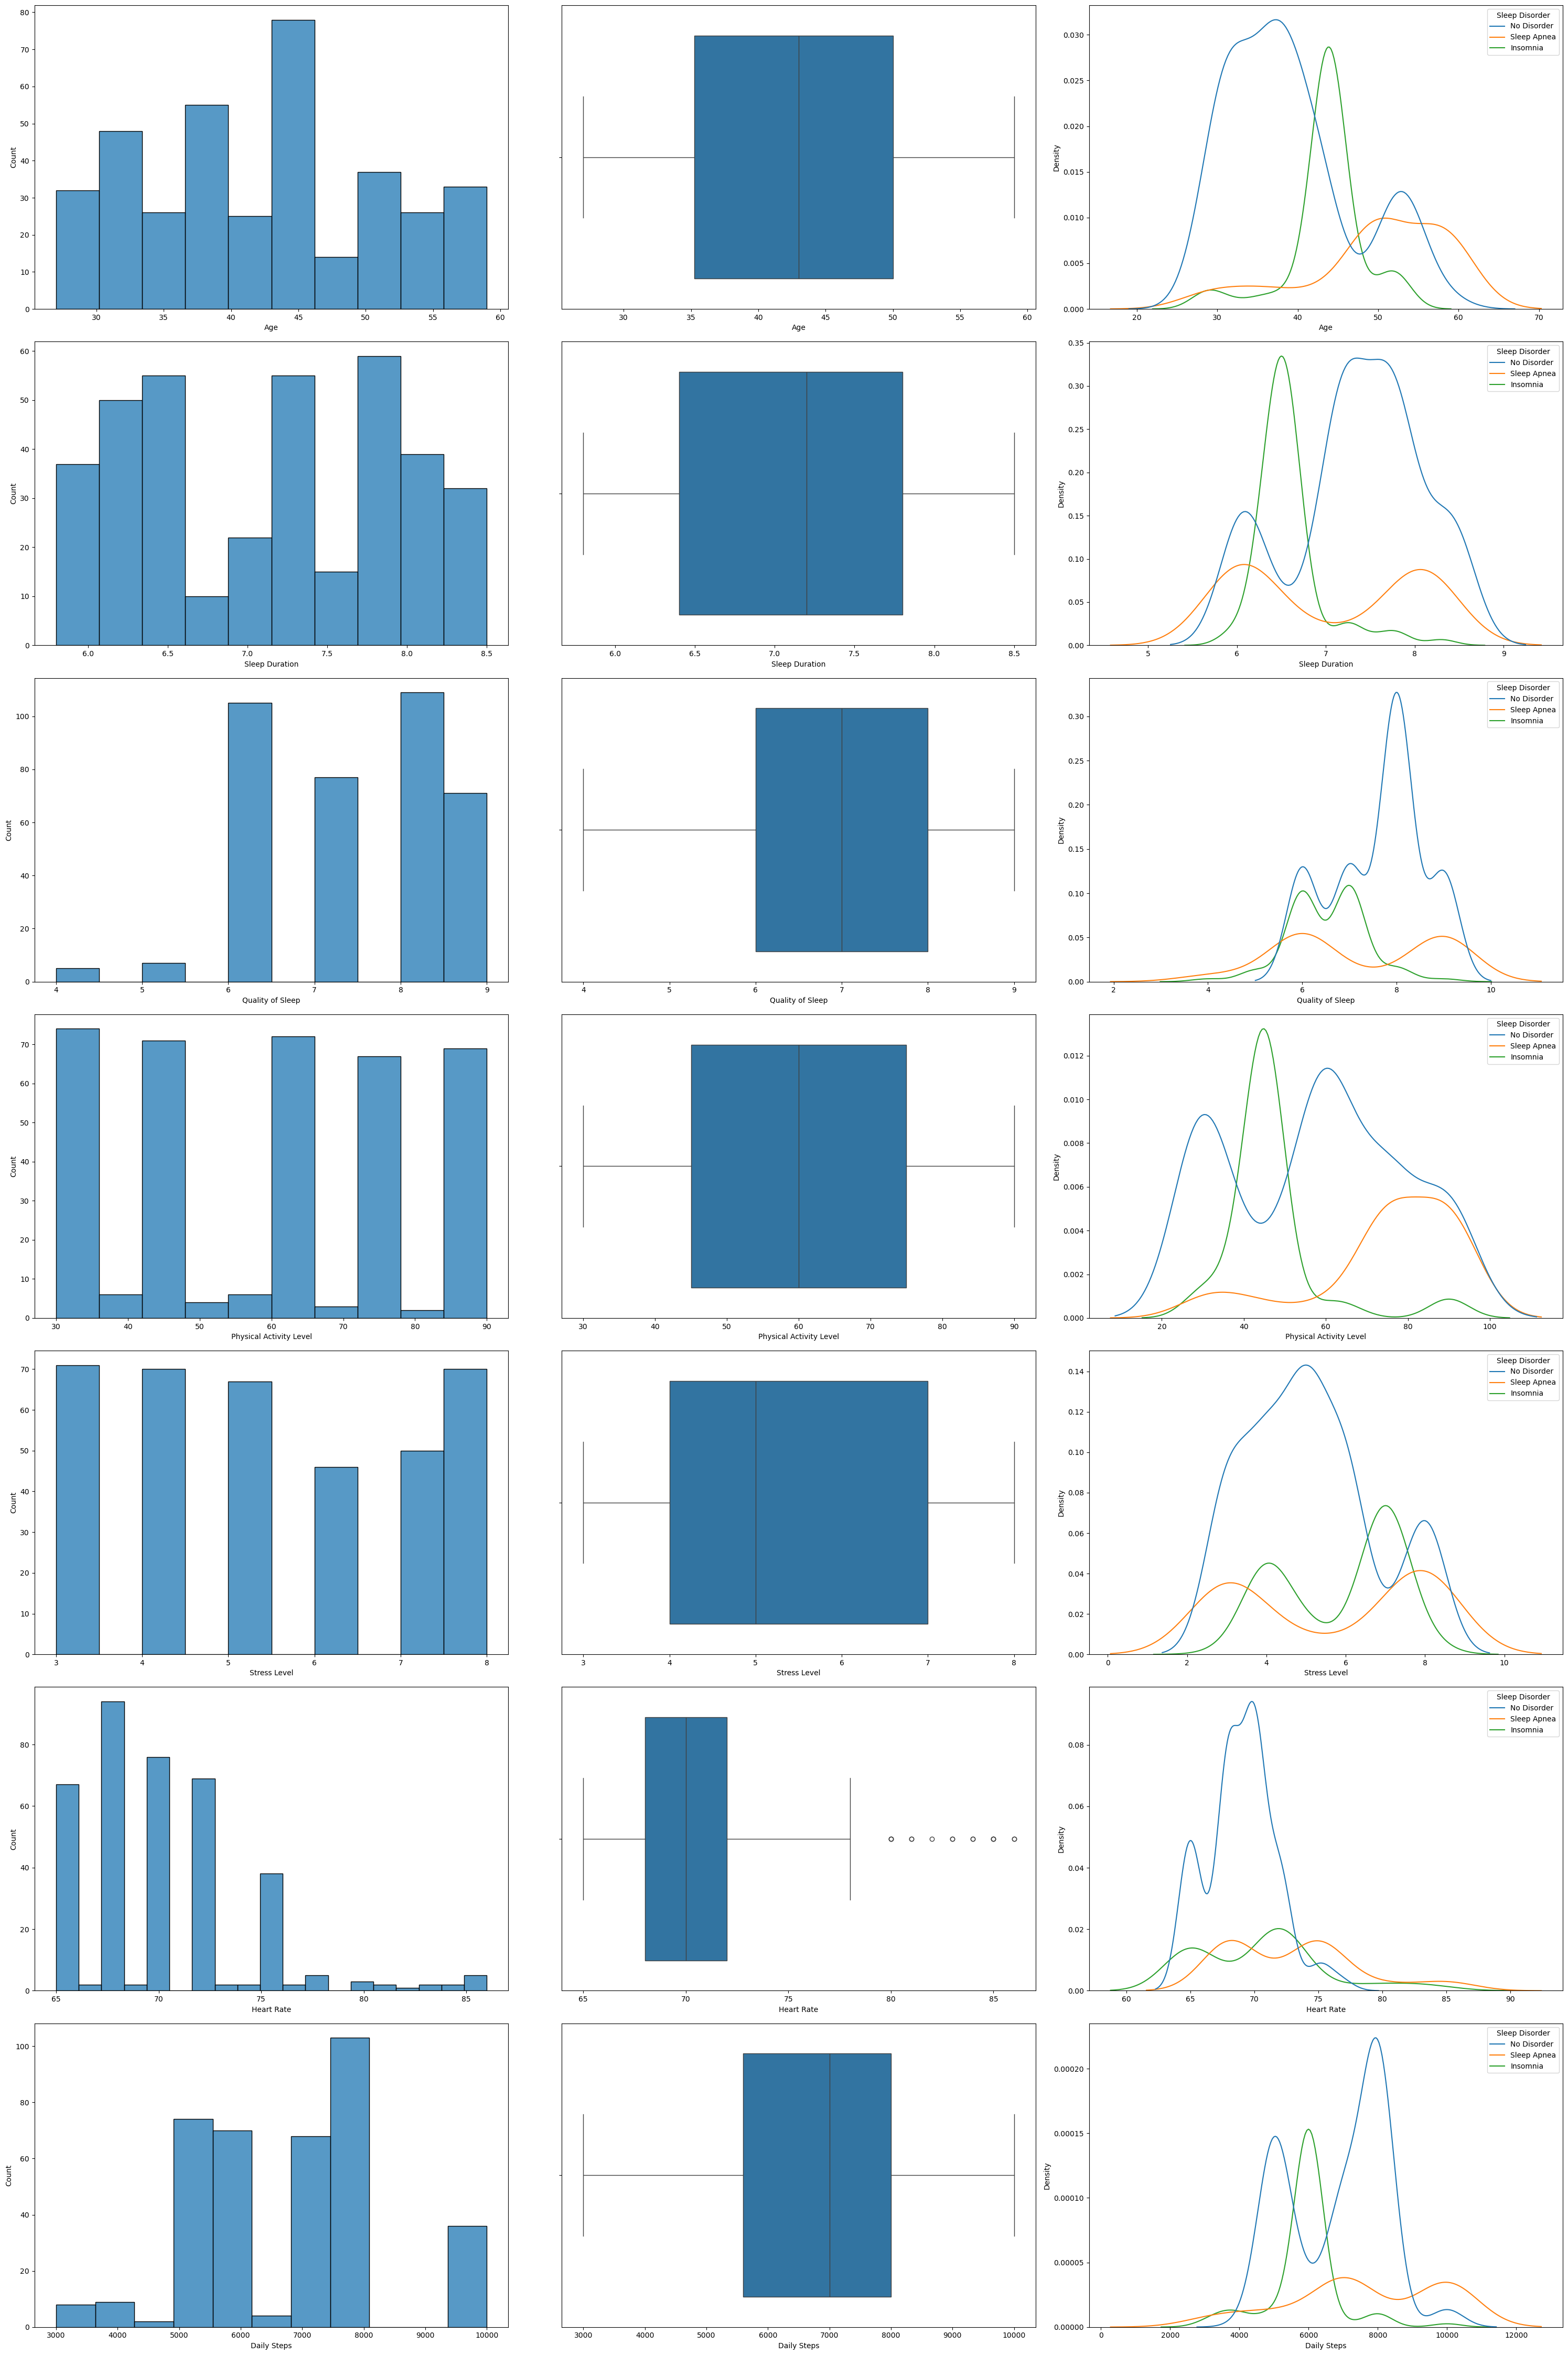

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns


num_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(30,45))

for i in range(7):
    ax1 = sns.histplot(data=df,x=num_features[i], ax=axs[i,0])
    ax2 = sns.boxplot(data=df, x=num_features[i], ax=axs[i,1])
    ax3 = sns.kdeplot(data=df, x=num_features[i], hue='Sleep Disorder', ax=axs[i,2])
    
plt.tight_layout()

As you could see in the box plot for the heart rate, we could say there are some outliers.

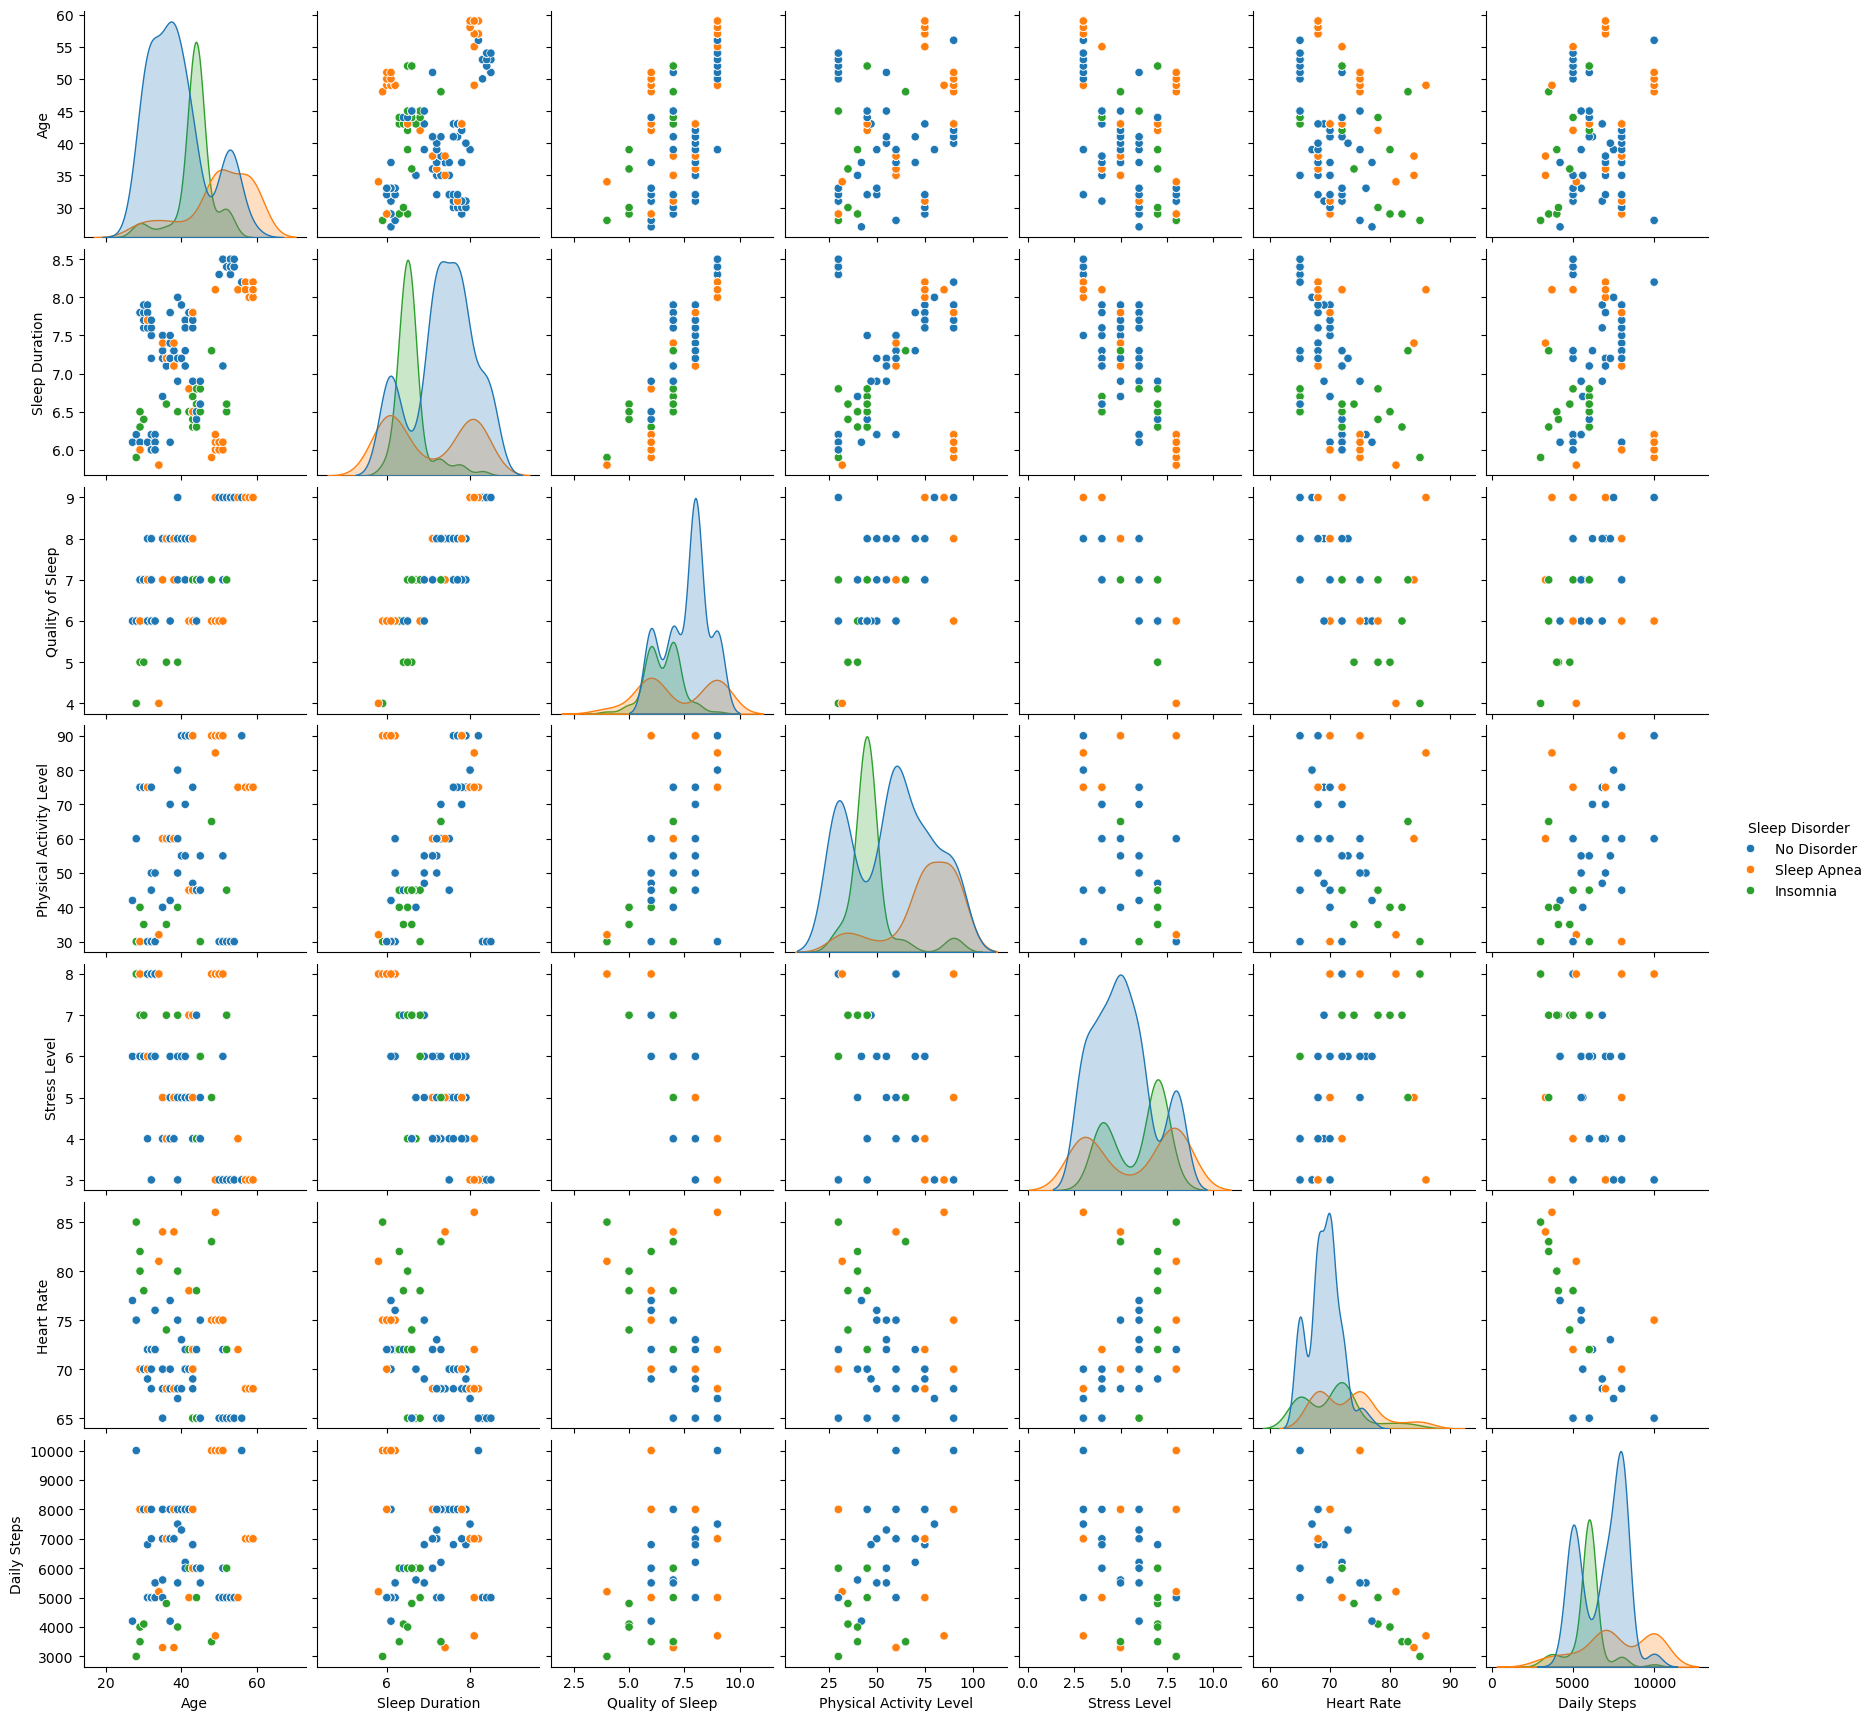

In [287]:
# Don't Use Person Id
sns.pairplot(df.iloc[:,1:], hue='Sleep Disorder')

### Hypothesis Testing:

a) Does women’s sleep duration follow a normal distribution?
we both `visualize` it and test it using `Shapiro-Wilk Test`

In [293]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for women
women_sleep_duration = df[df["Gender"] == "Female"]["Sleep Duration"]

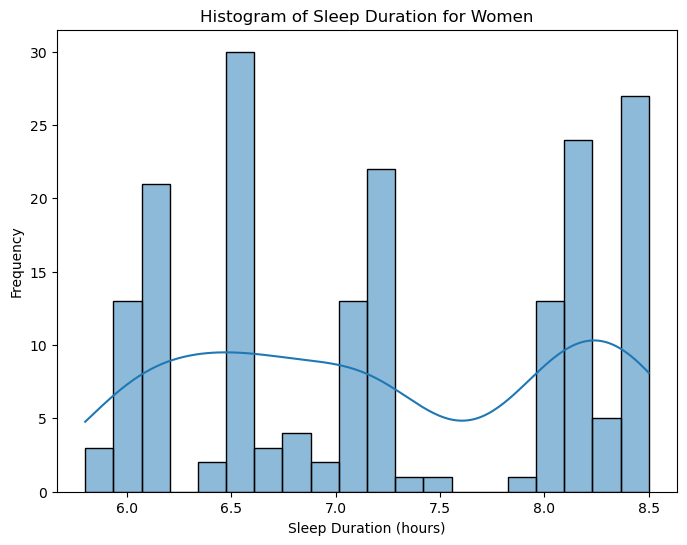

Shapiro-Wilk Test Statistic: 0.8985763558917751
Shapiro-Wilk p-value: 6.360571286948505e-10


In [299]:
# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(women_sleep_duration, bins=20, kde=True)
plt.title("Histogram of Sleep Duration for Women")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.show()

shapiro_test = stats.shapiro(women_sleep_duration)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

As we both see the visulaiztion and the output p-value of Shapiro-Wilk test we could say that we reject null hypothesis and the data is not normally distributed.

b) Is having higher daily steps a contributing factor into better sleep? Check the corresponding correlation of Daily Steps and Quality of Sleep.

we both use visualization and the pearson correlation(we assume our data is normally distributed) to see it:

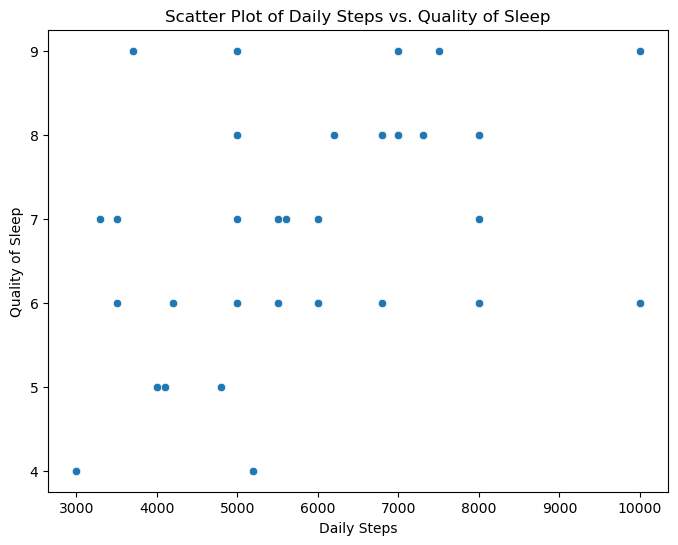

Pearson Correlation Coefficient: 0.016791414924717057
P-value: 0.7461906652961076


In [306]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Daily Steps"], y=df["Quality of Sleep"])
plt.title("Scatter Plot of Daily Steps vs. Quality of Sleep")
plt.xlabel("Daily Steps")
plt.ylabel("Quality of Sleep")
plt.show()

# Compute Pearson correlation
correlation, p_value = stats.pearsonr(df["Daily Steps"], df["Quality of Sleep"])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

What we observe from the visualization and the output values is that a higher number of daily steps does not contribute to better sleep.

c) Is stress level different among different occupations? First, check this hypothesis with a test, and then compute the average stress level among different occupations. Use a bar chart or any other desired visualization method to demonstrate the result.

As we want to compare stress levels across multiple occupations we must use ANOVA test for this part, with these hypothesis:

- H0 -> mean stress level is the same across all occupations
- H1 -> at least one occupation has a significantly different mean stress level.

In [311]:
import scipy.stats as stats

groups = [df[df["Occupation"] == occ]["Stress Level"] for occ in df["Occupation"].unique()]

anova_result = stats.f_oneway(*groups)

print("ANOVA Test Statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

ANOVA Test Statistic: 21.63598878521177
P-value: 1.355091231304278e-31


Since the p-value is very small and less than 0.05, we can strongly reject the null hypothesis (H0) and conclude that at least one occupation has a significantly different mean stress level.

In [331]:
# Avg stress level per occupation
occupation_stress = df.groupby("Occupation")["Stress Level"].mean().reset_index()
display(occupation_stress)

,Occupation,Stress Level
0,Accountant,4.594595
1,Doctor,6.732394
2,Engineer,3.888889
3,Lawyer,5.063830
4,Manager,5.000000
5,Nurse,5.547945
6,Sales Representative,8.000000
7,Salesperson,7.000000
8,Scientist,7.000000
9,Software Engineer,6.000000


/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_49252/2423766645.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Occupation", y="Stress Level", data=occupation_stress, palette="viridis")


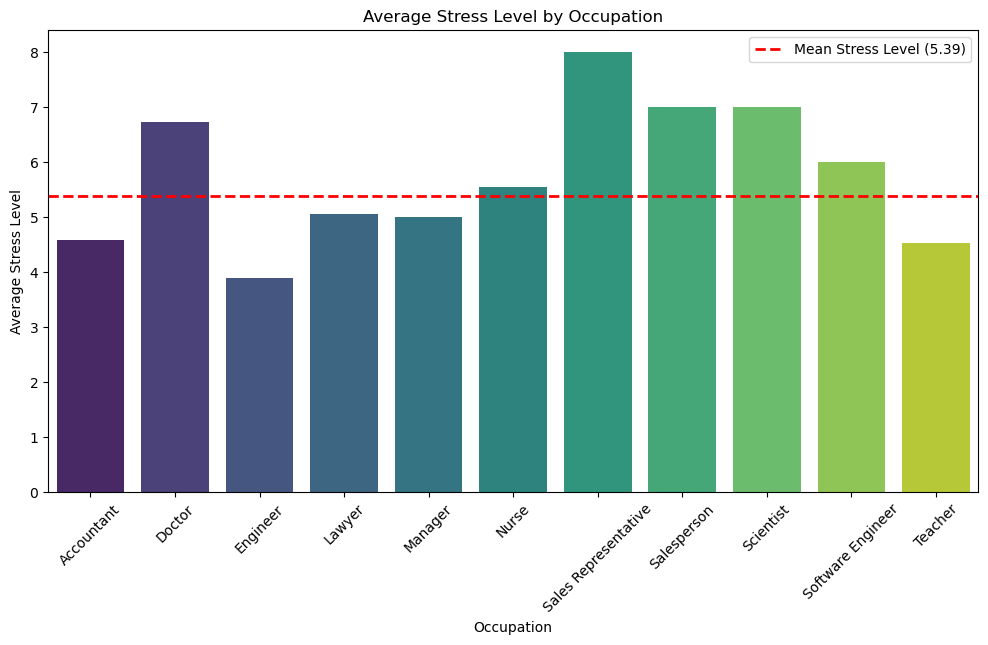

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute overall mean stress level
mean_stress = df["Stress Level"].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x="Occupation", y="Stress Level", data=occupation_stress, palette="viridis")
plt.axhline(mean_stress, color='red', linestyle='--', linewidth=2, label=f"Mean Stress Level ({mean_stress:.2f})")
plt.xticks(rotation=45)
plt.title("Average Stress Level by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Stress Level")
plt.legend()
plt.show()

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_49252/2947528852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Occupation", y="Stress Level", data=df, palette="coolwarm")


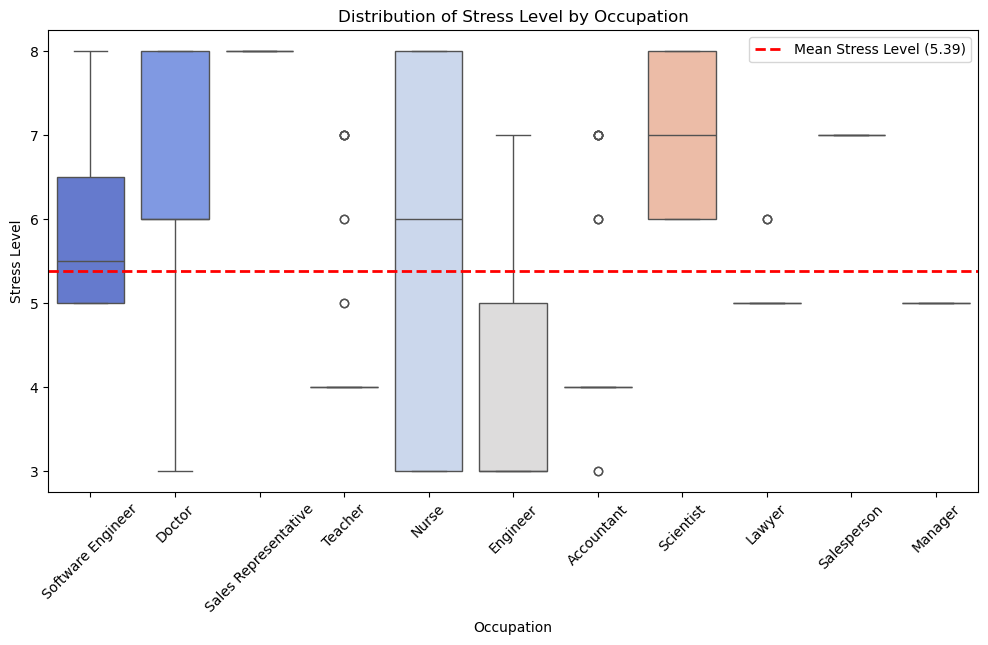

In [335]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Occupation", y="Stress Level", data=df, palette="coolwarm")
plt.axhline(mean_stress, color='red', linestyle='--', linewidth=2, label=f"Mean Stress Level ({mean_stress:.2f})")
plt.xticks(rotation=45)
plt.title("Distribution of Stress Level by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Stress Level")
plt.legend()
plt.show()

d) Are different BMI categories significantly different given their blood pressure? (Hint: Convert blood pressure into two columns and apply your test given these new two features.)

first we make these two new columns then we will use ANOVA to test if there is a significant difference in systolic and diastolic blood pressure across different BMI categories.

In [339]:
import scipy.stats as stats


df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Group systolic BP by BMI category
systolic_groups = [df[df["BMI Category"] == bmi]["Systolic_BP"] for bmi in df["BMI Category"].unique()]

# Perform ANOVA test
anova_systolic = stats.f_oneway(*systolic_groups)

print("ANOVA Test for Systolic Blood Pressure:")
print("F-statistic:", anova_systolic.statistic)
print("P-value:", anova_systolic.pvalue)

ANOVA Test for Systolic Blood Pressure:
F-statistic: 163.545195439236
P-value: 1.7438768080834315e-67


with this p-value we reject the null hypothesis, meaning at least one BMI category has a significantly different blood pressure

In [341]:
# Group diastolic BP by BMI category
diastolic_groups = [df[df["BMI Category"] == bmi]["Diastolic_BP"] for bmi in df["BMI Category"].unique()]

# Perform ANOVA test
anova_diastolic = stats.f_oneway(*diastolic_groups)

print("\nANOVA Test for Diastolic Blood Pressure:")
print("F-statistic:", anova_diastolic.statistic)
print("P-value:", anova_diastolic.pvalue)


ANOVA Test for Diastolic Blood Pressure:
F-statistic: 179.09700388935
P-value: 1.0189415858614994e-71


with this p-value we reject the null hypothesis, meaning at least one BMI category has a significantly different blood pressure

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_49252/4026070576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BMI Category", y="Systolic_BP", data=df, palette="coolwarm")


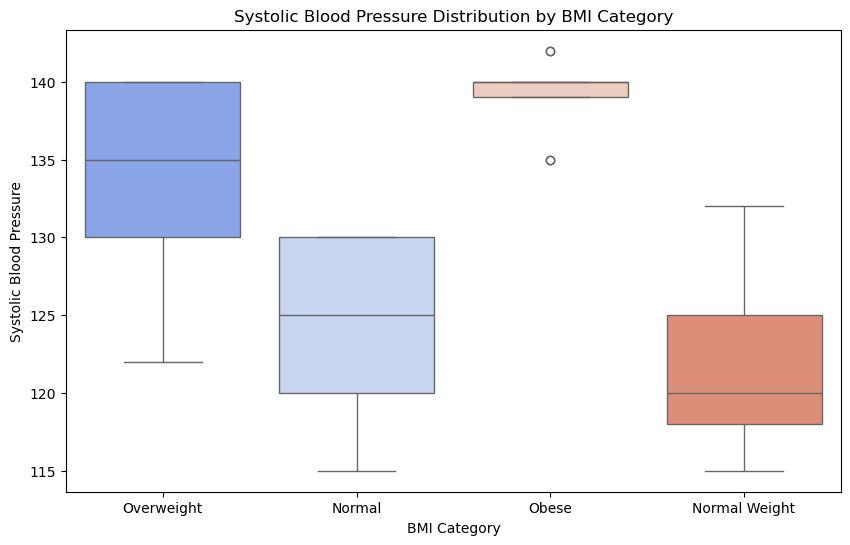

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_49252/4026070576.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BMI Category", y="Diastolic_BP", data=df, palette="magma")


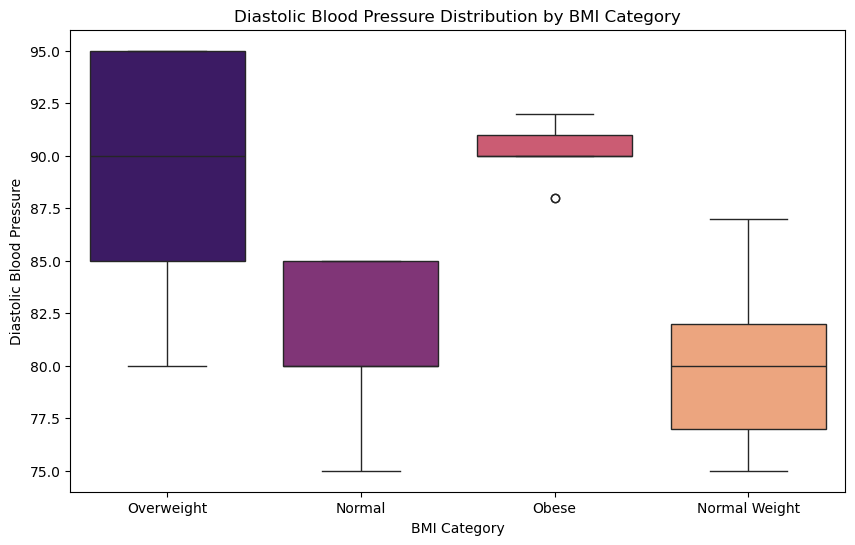

In [350]:
# Visualizing

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="BMI Category", y="Systolic_BP", data=df, palette="coolwarm")
plt.title("Systolic Blood Pressure Distribution by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Systolic Blood Pressure")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="BMI Category", y="Diastolic_BP", data=df, palette="magma")
plt.title("Diastolic Blood Pressure Distribution by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Diastolic Blood Pressure")
plt.show()

### Proposing New Hypothesis
1) Is there a significant relationship between Age and Sleep Duration?


In [357]:
pearson_corr, pearson_p = stats.pearsonr(df['Age'], df['Sleep Duration'])
print(f"Pearson correlation between Age and Sleep Duration: {pearson_corr:.3f} (p-value: {pearson_p:.3f})")

spearman_corr, spearman_p = stats.spearmanr(df['Age'], df['Sleep Duration'])
print(f"Spearman correlation between Age and Sleep Duration: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Pearson correlation between Age and Sleep Duration: 0.345 (p-value: 0.000)
Spearman correlation between Age and Sleep Duration: 0.312 (p-value: 0.000)


with the above p-values and the plots in the first visualization part, we could say that there is no linear or monotonic relationship between age and sleep duration.

2) Does higher Physical Activity Level correlate with better Quality of Sleep?

In [359]:
pearson_corr_g, pearson_p_g = stats.pearsonr(df['Physical Activity Level'], df['Quality of Sleep'])
print(f"Pearson correlation between Physical Activity Level and Quality of Sleep: {pearson_corr_g:.3f} (p-value: {pearson_p_g:.3f})")

spearman_corr_g, spearman_p_g = stats.spearmanr(df['Physical Activity Level'], df['Quality of Sleep'])
print(f"Spearman correlation between Physical Activity Level and Quality of Sleep: {spearman_corr_g:.3f} (p-value: {spearman_p_g:.3f})")

Pearson correlation between Physical Activity Level and Quality of Sleep: 0.193 (p-value: 0.000)
Spearman correlation between Physical Activity Level and Quality of Sleep: 0.178 (p-value: 0.001)


with the above p-values and the plots in the first visualization part, we could say that there is no linear or monotonic relationship between age and sleep duration.

3) Do sleep disorder patients have higher heart rates?

Test used: Mann-Whitney U test
Statistic: 22399.0000, p-value: 0.0000
=> Reject null hypothesis: Significant difference in heart rates.


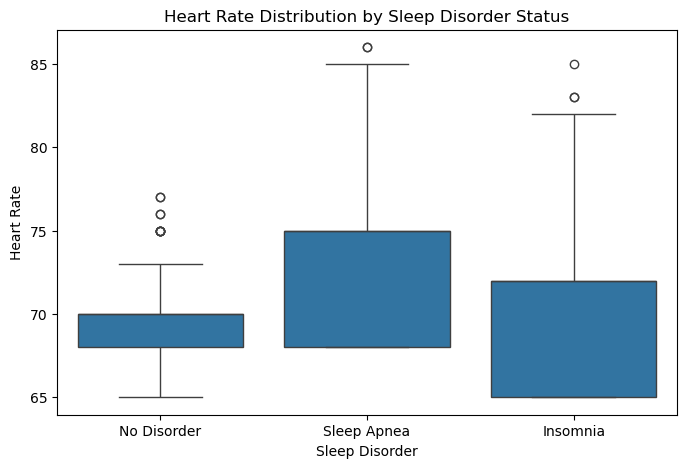

In [365]:
from scipy.stats import shapiro
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu


group_with_disorder = df[df['Sleep Disorder'] != 'No Disorder']['Heart Rate']
group_without_disorder = df[df['Sleep Disorder'] == 'No Disorder']['Heart Rate']

shapiro_with = shapiro(group_with_disorder)
shapiro_without = shapiro(group_without_disorder)

# Perform appropriate statistical test
if shapiro_with.pvalue > 0.05 and shapiro_without.pvalue > 0.05 :
    stat, p = ttest_ind(group_with_disorder, group_without_disorder)
    test_type = "Independent t-test"
else:
    stat, p = mannwhitneyu(group_with_disorder, group_without_disorder)
    test_type = "Mann-Whitney U test"

print(f"Test used: {test_type}")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

if p < 0.05:
    print("=> Reject null hypothesis: Significant difference in heart rates.")
else:
    print("=> Fail to reject null hypothesis: No significant difference.")

plt.figure(figsize=(8, 5))
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df)
plt.title("Heart Rate Distribution by Sleep Disorder Status")
plt.show()

## Student Performance Factors 
### EDA

In [368]:
import pandas as pd

df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [377]:
df.shape

(6607, 20)

In [372]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

we have some null values in Teacher_Quality, Parental_Education_Level and Distance_from_Home, lets take a look at them:

In [385]:
null_columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

for column in null_columns:
    print(f"Unique values for {column}: {df[column].unique()}")

Unique values for Teacher_Quality: ['Medium' 'High' 'Low' nan]
Unique values for Parental_Education_Level: ['High School' 'College' 'Postgraduate' nan]
Unique values for Distance_from_Home: ['Near' 'Moderate' 'Far' nan]


we have some options:
1) delete these null values
2) replace the missing values with its most frequent value in that column.
3) consider the null value as a category
4) Interpolation methods estimate missing values based on the values of neighboring data points.
5) ...

but in here because of the low number of null values and high number of rows, we could delete these with out any risk.

In [398]:
df = df.dropna()
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [402]:
df.duplicated().sum()

0

In [408]:
df.describe().style.background_gradient()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [427]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

### Visualizations

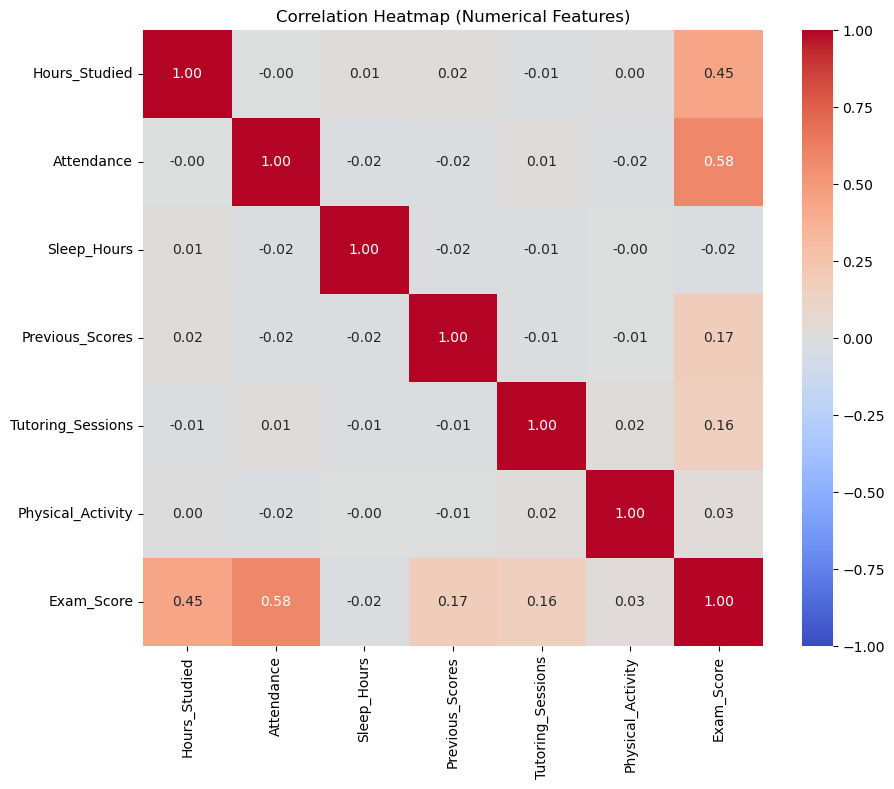

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
    'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'
]

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

The features that have most correlation to Exam Score is Hours Studied and Attendance.

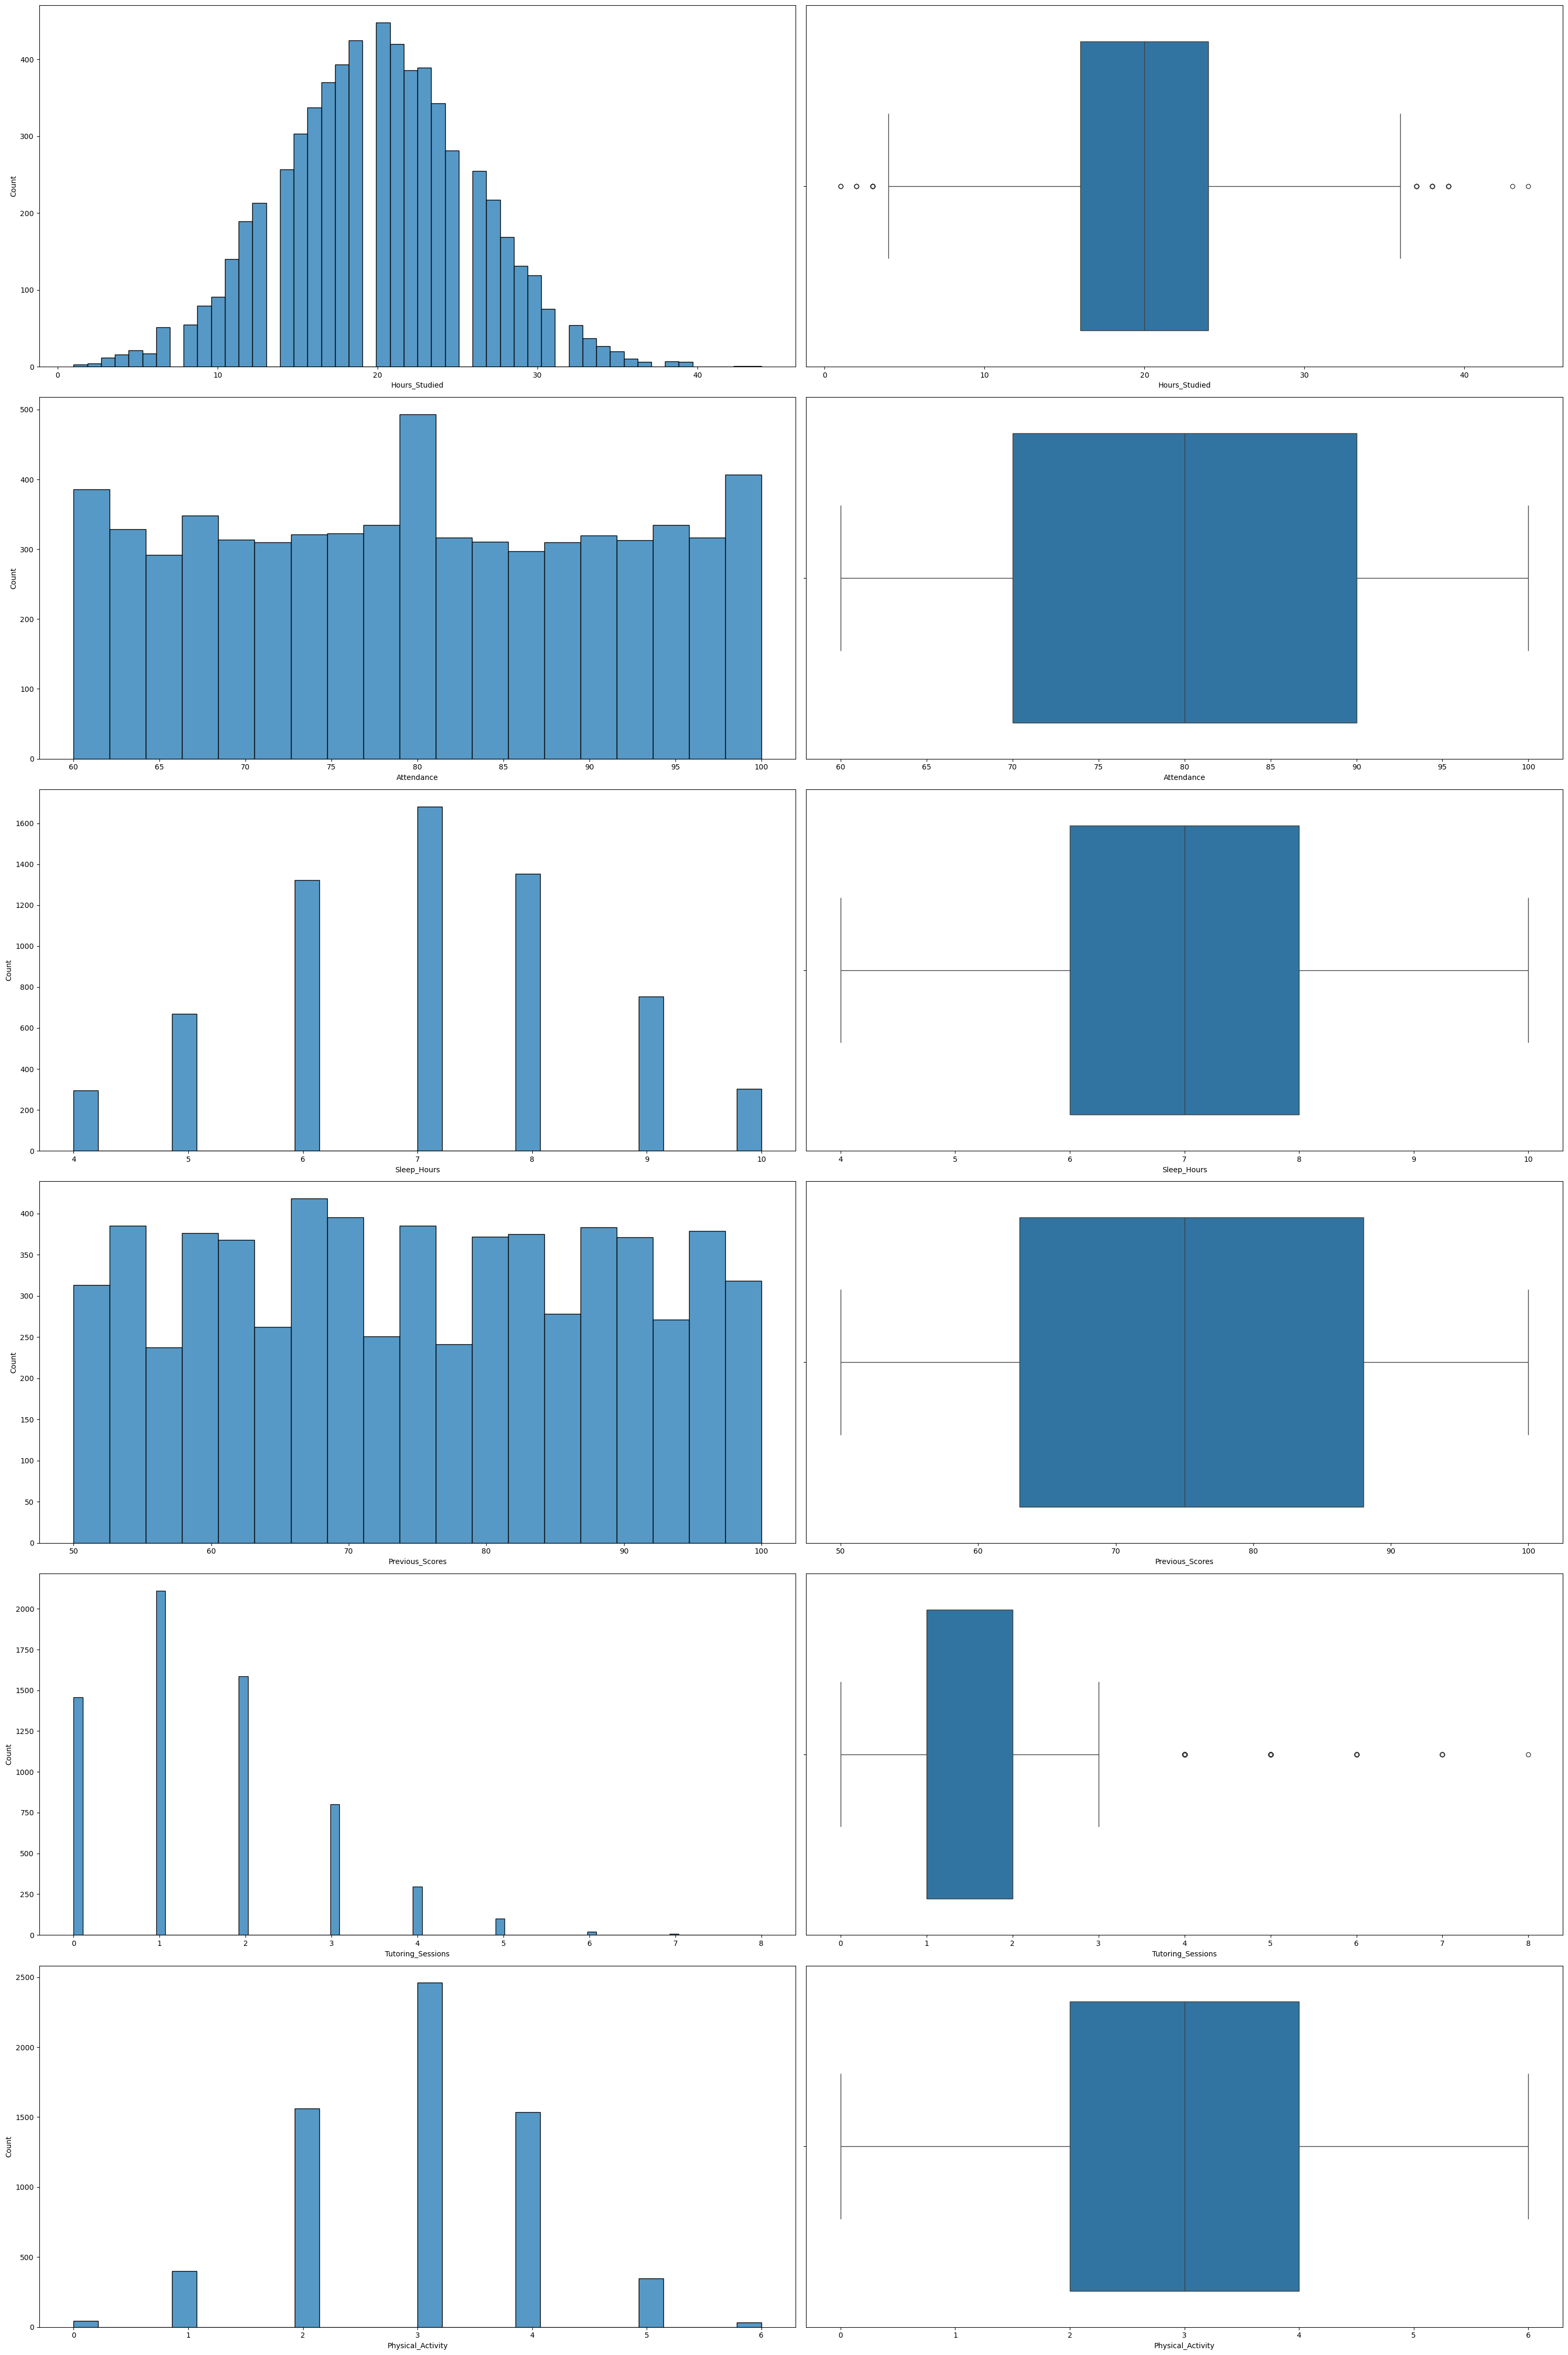

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
    'Tutoring_Sessions', 'Physical_Activity']

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(30,45))

for i in range(6):
    ax1 = sns.histplot(data=df,x=numerical_cols[i], ax=axs[i,0])
    ax2 = sns.boxplot(data=df, x=numerical_cols[i], ax=axs[i,1])
    
plt.tight_layout()

as this exam score is continues we can't see the distribtuion of this exam score, except convert it to categorical values like High Medium Low or make intervals 80-100 60-80 and ...

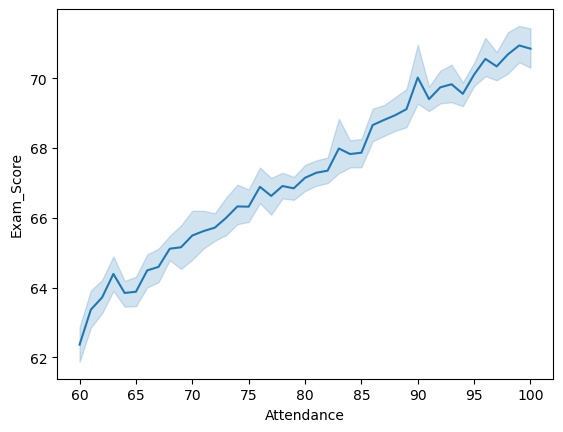

In [445]:
sns.lineplot(x='Attendance', y='Exam_Score', data=df)
plt.show()

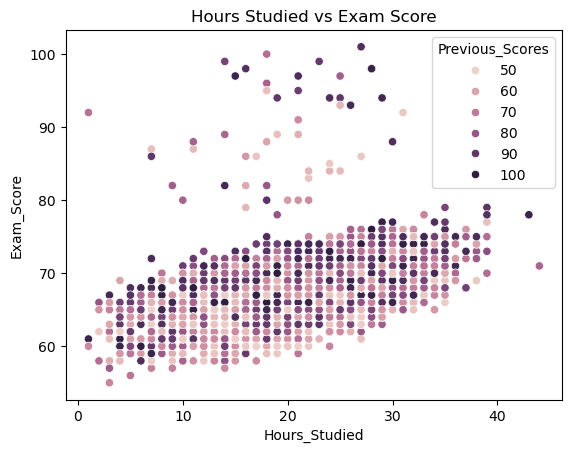

In [447]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, hue='Previous_Scores')
plt.title('Hours Studied vs Exam Score')
plt.show()

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_49252/3786698392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Exam_Score', data=df, palette=['#FFB6C1', '#87CEEB'])


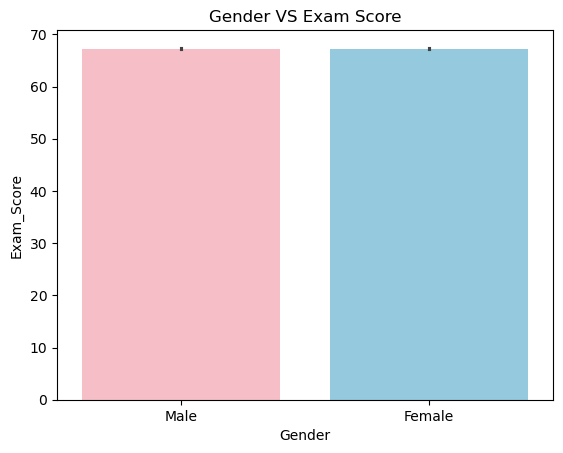

In [451]:
sns.barplot(x='Gender', y='Exam_Score', data=df, palette=['#FFB6C1', '#87CEEB'])
plt.title('Gender VS Exam Score')
plt.show()

### Hypothesis
In this section we must generate 5 hypothesis tests that we mostly curious about in this dataset.
1) Is there any linear relationship between `Hours_Studied` and `Exam_Score`

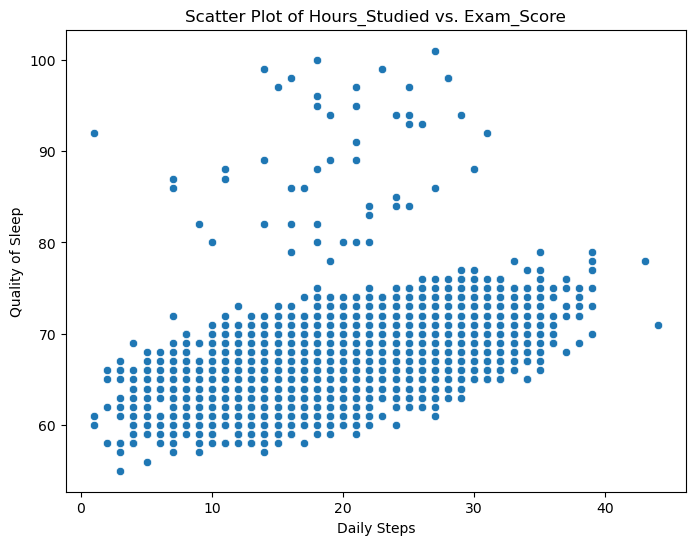

Pearson Correlation Coefficient: 0.445104140265128
P-value: 4.524802143239454e-308


In [460]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Hours_Studied"], y=df["Exam_Score"])
plt.title("Scatter Plot of Hours_Studied vs. Exam_Score")
plt.xlabel("Daily Steps")
plt.ylabel("Quality of Sleep")
plt.show()

correlation, p_value = stats.pearsonr(df["Hours_Studied"], df["Exam_Score"])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

respect to this p-value, no there is not.

In [463]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


2) Compare mean Exam_Score across groups of Parental Education Level

In [469]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming your DataFrame is called df
# Fit an OLS model with Exam_Score as the outcome and Parental_Education_Level as a categorical predictor
model = smf.ols('Exam_Score ~ C(Parental_Education_Level)', data=df).fit()

# Perform the ANOVA test
anova_results = sm.stats.anova_lm(model, typ=2)
print("ANOVA results for Parental_Education_Level:")
print(anova_results)

ANOVA results for Parental_Education_Level:
                                   sum_sq      df          F        PR(>F)
C(Parental_Education_Level)   1089.555877     2.0  35.947108  2.990498e-16
Residual                     96613.040548  6375.0        NaN           NaN


Parental_Education_Level
College         [61, 70, 69, 68, 60, 67, 66, 66, 71, 64, 69, 6...
High School     [67, 71, 67, 66, 72, 71, 70, 64, 65, 69, 72, 6...
Postgraduate    [74, 71, 66, 65, 64, 67, 68, 66, 66, 70, 68, 7...
Name: Exam_Score, dtype: object

<Figure size 800x600 with 0 Axes>

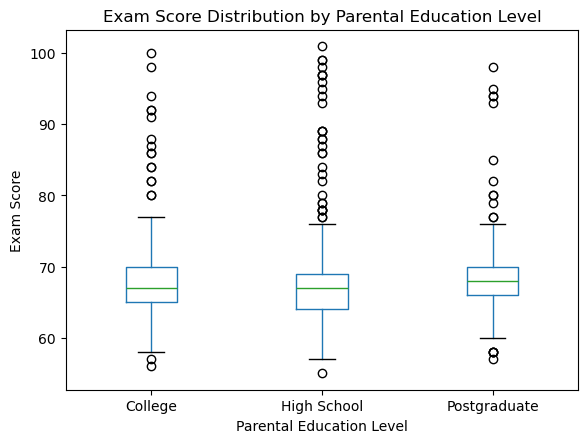


ANOVA Results:
F-statistic: 35.94710753828243
p-value: 2.990498089872518e-16


In [483]:
groups = df.groupby('Parental_Education_Level')['Exam_Score'].apply(list)
display(groups)

plt.figure(figsize=(8, 6))
df.boxplot(column='Exam_Score', by='Parental_Education_Level', grid=False)
plt.title('Exam Score Distribution by Parental Education Level')
plt.suptitle('')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.show()

f_stat, p_value = stats.f_oneway(*groups)
print("\nANOVA Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

with the calculated p-value we could say that there is diffrence in mean Examp_Score among different parental education levels.

3) Test association Access_to_Resources vs. Internet_Access.

Contingency Table:
Internet_Access       No   Yes
Access_to_Resources           
High                 153  1747
Low                   85  1189
Medium               247  2957


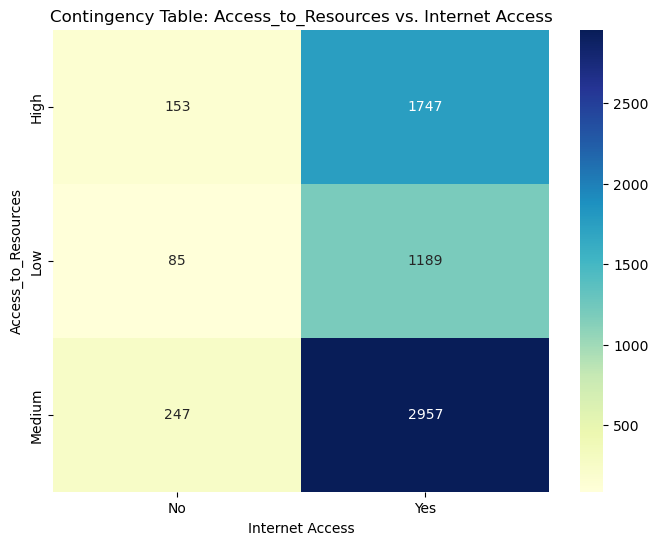


Chi-square Test Results:
Chi-squared Statistic: 2.1700480317666146
p-value: 0.3378936709822974
Degrees of Freedom: 2
Expected Frequencies:
[[ 144.48102854 1755.51897146]
 [  96.87833177 1177.12166823]
 [ 243.6406397  2960.3593603 ]]


In [491]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame

# Create a contingency table using pd.crosstab
contingency_table = pd.crosstab(df['Access_to_Resources'], df['Internet_Access'])
print("Contingency Table:")
print(contingency_table)



# Visualize the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Contingency Table: Access_to_Resources vs. Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Access_to_Resources')
plt.show()

# Perform the Chi-square test for independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-square Test Results:")
print("Chi-squared Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

with the p-value > 0.05 we could say there is no association between Access_to_Resources and Internet_Access.

4) Test monotonic relationship between Motivation_Level vs. Exam_Score.

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_49252/2863803574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Motivation_Level'], y=df['Exam_Score'], palette='coolwarm')


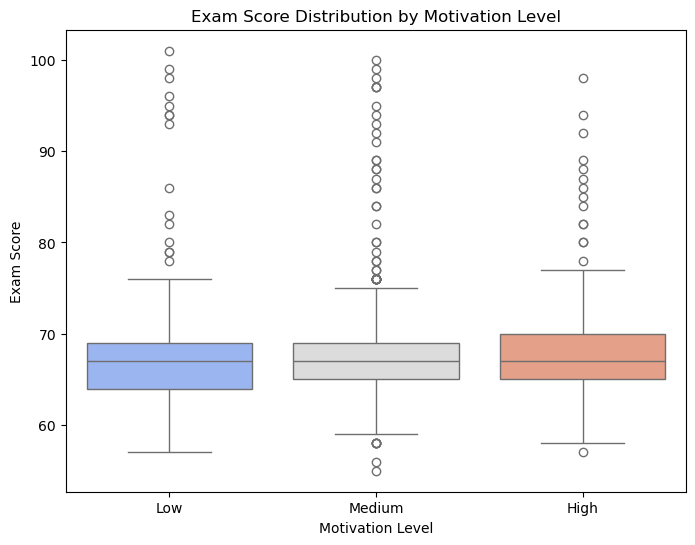

Spearman Correlation Coefficient: -0.003260823415639657
P-value: 0.7945808702756013


In [497]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


# Visualization: Boxplot to show Exam_Score distribution across Motivation_Level
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Motivation_Level'], y=df['Exam_Score'], palette='coolwarm')
plt.title('Exam Score Distribution by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.show()


# Compute Spearman correlation
spearman_corr, p_value = stats.spearmanr(df['Motivation_Level'], df['Exam_Score'])

# Print results
print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

with this p-value > 0.05 we could say that there is no monotonic relation ship.

In [502]:
df['Learning_Disabilities'].unique()

array(['No', 'Yes'], dtype=object)

5) check normallity of Exam_Score

Shapiro-Wilk Test Statistic: 0.901053111452056
P-value: 1.7692375596991308e-53
Exam_Score is NOT normally distributed (Reject H₀).


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6378.
  res = hypotest_fun_out(*samples, **kwds)


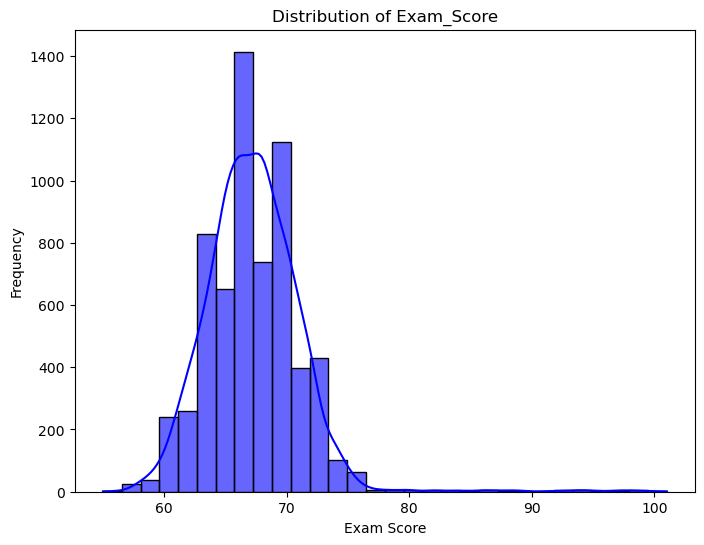

In [505]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values in Exam_Score
exam_scores = df['Exam_Score'].dropna()

# Perform Shapiro-Wilk test
shapiro_stat, p_value = stats.shapiro(exam_scores)

# Print results
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Exam_Score is NOT normally distributed (Reject H₀).")
else:
    print("Exam_Score appears to be normally distributed (Fail to reject H₀).")

# Visualization: Histogram + KDE Plot
plt.figure(figsize=(8, 6))
sns.histplot(exam_scores, kde=True, bins=30, color="blue", alpha=0.6)
plt.title('Distribution of Exam_Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()